# Typing study game completer (Selenium)
### The aim of this notebook is to demonstrate how selenium can be used to complete a basic online game using some of its simplest funcionalities. The game in question is a simple typing game on the website: https://www.typingstudy.com/.
###### The time required for this notebook to run is approx. 3mins 40 seconds

--------------------------------
## Section 1

### Import libraries

##### For this notebook BeautifulSoup will be required as well as selenium. The website is plagued with ads so a reference to an adblock installed on my version of chrome is added in the chrome webdriver.
##### Typically, the webdriver is one that is already installed on the system but due to an issue on my own personal machine, this is downloaded and implemeneted into the code which presents a possible bottleneck for the code as it requires files to be downloaded from the internet.

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
## Adblock
path_to_extension = r'C:\Users\IkramChoudhury\AppData\Local\Google\Chrome\User Data\Default\Extensions\cfhdojbkjhnklbpkdaibdccddilifddb\3.14.2_0'
chrome_options = Options()
chrome_options.add_argument('load-extension=' + path_to_extension)


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrome_options)

import time
from selenium.common.exceptions import NoSuchElementException

### A connection then needs to be made by setting up the url and allowing selenium to click on the first lesson and drill so the loops in section 2 can be implemented

In [2]:
url = 'https://www.typingstudy.com/'

In [3]:
driver.get(url)

#### IN [4] uses an xpath which works for this notebook but for subsequent iterations, the CSS class should be used due to their speed and efficiency. To get the xpath, an inspect element was used. The element which was inspected is highlighted in figure 1.1
##### Differences between xpath and CSS can be further explained  on: https://www.testim.io/blog/xpath-vs-css-selector-difference-choose/

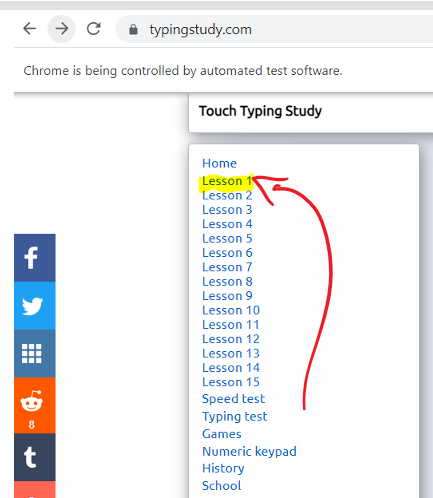
(figure 1.1) First link to click to initiate the game 

In [4]:
## lesson loader
driver.find_element('xpath','/html/body/div[1]/div[2]/ul/li[2]/a').click()

-------
## Section 2

### Create functions

##### Two function were created although this could be simplified down to one function which would improve the efficiency of the code, further improvements can be made by vectorising and simplifying the loops within the functions. Further work would involve using lambda functions to replace the loops.

###### The first function reads the text which needs to be typed out and then sends it to the searchbox (defined as annotation 2 in figure 1) and types it out and hitting space at the end to go to the next drill. Once the drills are completed, the loop breaks as x (annotation 1 in figure 2.1) is no longer there

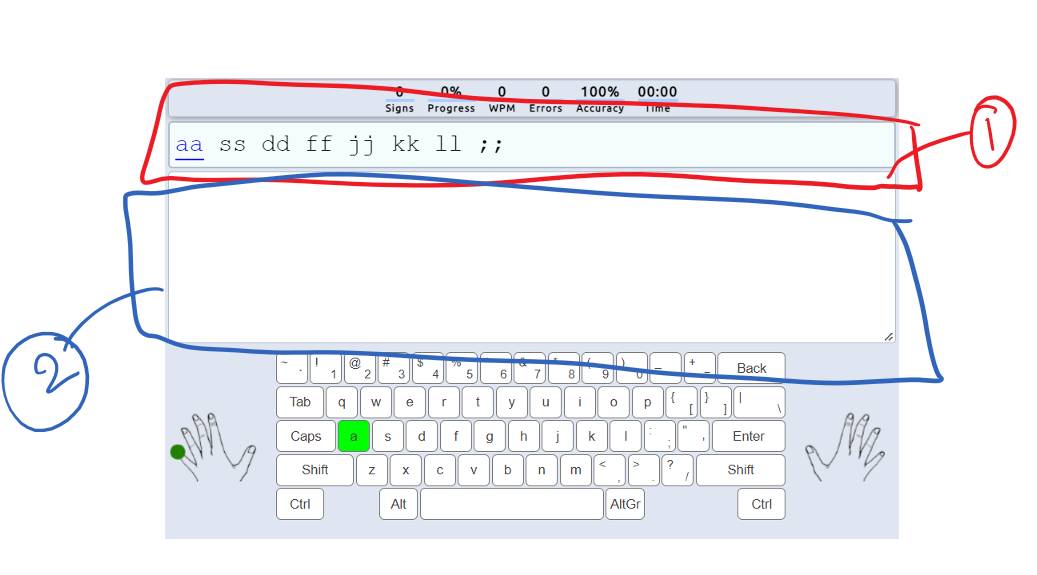
(Figure 2.1) Main game components

In [5]:
def type_func():    
    while True:
        try:
            # find what is written in the textbox [annotation 1 in figure 2.1]
            x = driver.find_element('xpath','/html/body/div[1]/div[3]/div[2]/div[2]').text

            #send the keys

            search_box = driver.find_element('xpath','/html/body/div[1]/div[3]/div[2]/div[3]/form/textarea')
            search_box.send_keys(x)
            search_box.send_keys(Keys.SPACE)
        except:
            break
    return

###### The second function will then click "click here" (figure 2.2) to move to the next lesson, this can be turned into one line of code instead of having it as a function.

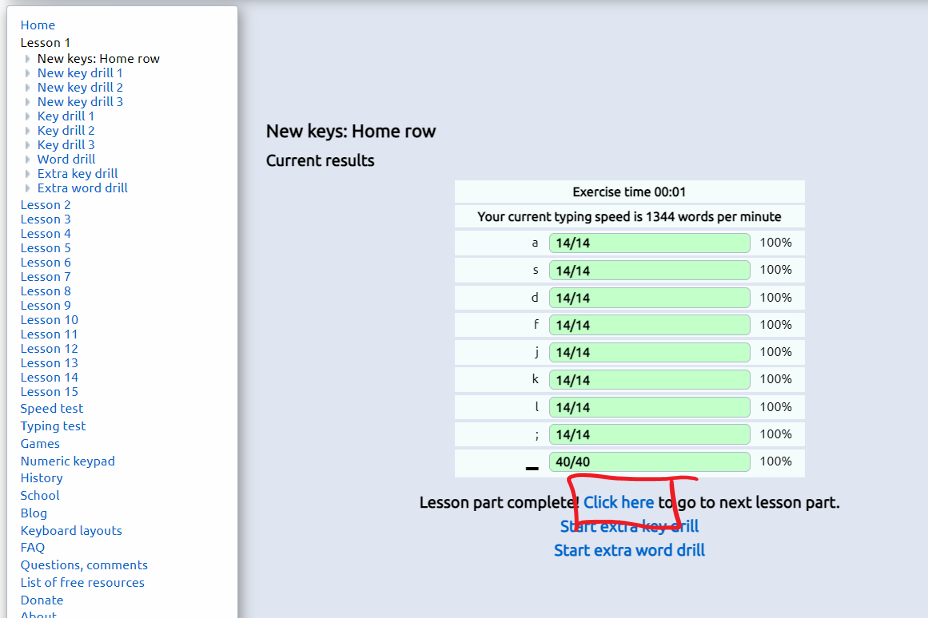
(figure 2.2) End screen of a lessson, showing the element which needs to be clicked to move forward to the next lesson

In [6]:
def click_func():
    while True:
        try:
            x = driver.find_element('xpath','/html/body/div[1]/div[3]/div[2]/div/div[1]/a').click()
        except:
            break
    return

----
## Section 3

### Final Loop

#### The final loop iterates between the type function and click function with sleep in the middle in order to allow the website to load. Since the Loop iterates through a try and except loop, the loop will stop iterating before the 500 loop limit is achieved. In subsequent notebooks, this should be optimised by making the range n and adding a line of code which counts the number of drills in a lesson and passes them into the loop to ensure that the loop only runs for the required amount without needing to break.

In [7]:
for i in range(1,500):
    try:
        type_func()
        time.sleep(0.05)
        click_func()
    except:
        break

##### Ikram Choudhury, 03/09/2022, version 1.0